In [23]:
import numpy as np

In [24]:
def get_confusion_matrix(
    threshold,  # доля от L
    H,  # Высота треугольника
    L,  # Его длина
):
    triangle_square = H * L / 2.

    similarity_coefficient = threshold
    
    FN = triangle_square * similarity_coefficient ** 2
    FP = triangle_square * (1 - similarity_coefficient) ** 2
    
    TN = triangle_square - FP
    TP = triangle_square - FN

    res = np.zeros((2, 2), dtype=np.float64)
    
    res[0, 0] = TN
    res[0, 1] = FP
    res[1, 0] = FN
    res[1, 1] = TP
    
    return res

## Анализ precision(threshold) и recall(threshold)

In [25]:
threshold_array = np.linspace(0.99, 0.01, 99)
H = 1.
L = 2.

precision_array = np.zeros_like(threshold_array)
recall_array = np.zeros_like(threshold_array)

for threshold_idx, threshold in enumerate(threshold_array):
    confusion_matrix = get_confusion_matrix(threshold=threshold, H=H, L=L)
    
    TN = confusion_matrix[0, 0]
    FP = confusion_matrix[0, 1]
    FN = confusion_matrix[1, 0]
    TP = confusion_matrix[1, 1]
    
    precision = TP / (TP + FP) 
    recall = TP / (TP + FN)

    precision_array[threshold_idx] = precision
    recall_array[threshold_idx] = recall


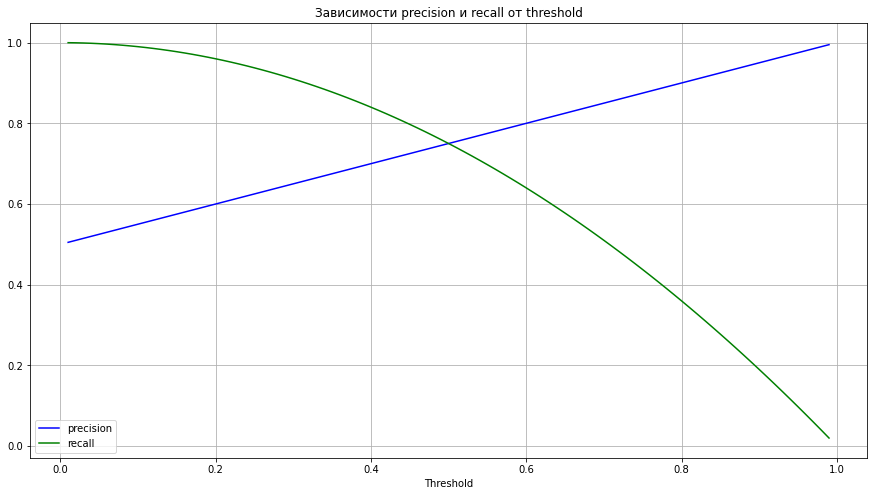

In [26]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

fig, ax = plt.subplots(1, 1, figsize=(15, 8))

plt.plot(threshold_array, precision_array, c='b', label='precision' )
plt.plot(threshold_array, recall_array, c='g', label='recall')

plt.xlabel('Threshold')
plt.title('Зависимости precision и recall от threshold')
plt.legend(loc = "lower left")
plt.grid()

## Посроение Precision-recall кривой

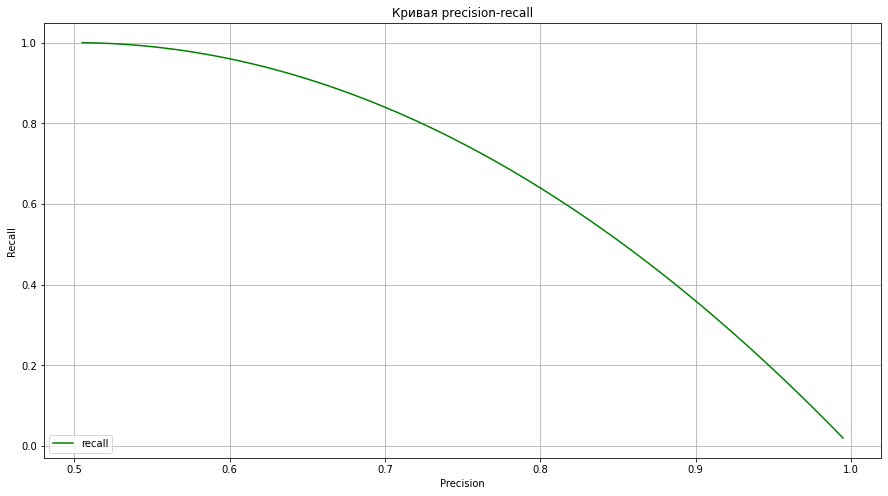

In [27]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

fig, ax = plt.subplots(1, 1, figsize=(15, 8))

plt.plot(precision_array, recall_array, c='g', label = 'recall')

plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Кривая precision-recall')
plt.legend(loc = "lower left")
plt.grid()

## Посроение ROC-кривой

In [28]:
threshold_array = np.linspace(0.99, 0.01, 99)
H = 1.
L = 2.

FPR_array = np.zeros_like(threshold_array)
TPR_array = np.zeros_like(threshold_array)

for threshold_idx, threshold in enumerate(threshold_array):
    confusion_matrix = get_confusion_matrix(threshold=threshold, H=H, L=L)
    
    TN = confusion_matrix[0, 0]
    FP = confusion_matrix[0, 1]
    FN = confusion_matrix[1, 0]
    TP = confusion_matrix[1, 1]
    
    FPR = FP / (FP + TN) 
    TPR = TP / (TP + FN)

    FPR_array[threshold_idx] = FP / (FP + TN) 
    TPR_array[threshold_idx] = TP / (TP + FN)


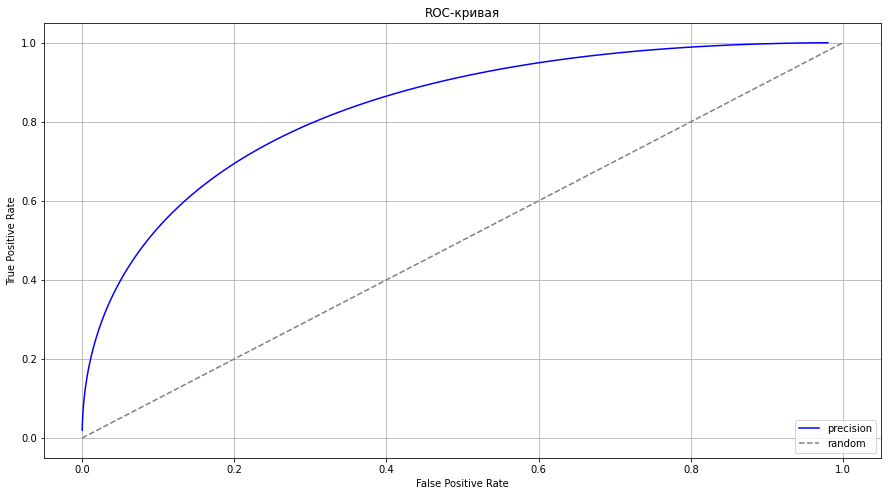

In [29]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

plt.plot(FPR_array, TPR_array, c='b', label = 'precision' )
plt.plot([0, 1], [0, 1], '--', color = 'grey', label = 'random')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc = "lower right")
plt.grid()